# Business Problem

The business problem is a radiologist who wants to double-check their work with a model that classifies x-rays as Pneumonia or normal.

# Data Understanding

The data consists of 5,856 chest x-ray images. Each image is labelled as either normal or pneumonia.  25% of the images are labelled normal and 75% pneumonia.  

In [1]:
from pathlib import Path

In [2]:
import numpy as np

In [3]:
i=Path('./data/archive/chest_xray/train')

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import array_to_img, img_to_array, load_img


In [5]:
import tensorflow as tf

Loading and converting data to array format.

In [73]:
#DONT RUN
train_data_dir = i

# Get all the data in the directory data/train, and reshape them
train_generator = ImageDataGenerator().flow_from_directory(
        train_data_dir, 
        target_size=(64, 64), batch_size=5216, color_mode = "grayscale")

# Create the datasets
train_images, train_labels = next(train_generator)

Found 5216 images belonging to 2 classes.


In [55]:
np.shape(train_images)

(5216, 64, 64, 1)

In [78]:
#DONT RUN


# Directory path
val_data_dir = './data/archive/chest_xray/val'
test_data_dir = './data/archive/chest_xray/test'

# Get all the data in the directory data/train (790 images), and reshape them
val_generator = ImageDataGenerator().flow_from_directory(
        val_data_dir, 
        target_size=(64, 64), batch_size= 16, color_mode = "grayscale")

# Get all the data in the directory data/validation (132 images), and reshape them
test_generator = ImageDataGenerator().flow_from_directory(
        test_data_dir, 
        target_size=(64, 64), batch_size=234+390, color_mode = "grayscale")


# Create the datasets
val_images, val_labels = next(val_generator)
test_images, test_labels = next(test_generator)

Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [15]:
sum(train_labels1)+ sum(test_labels1)+sum(val_labels1)

array([1583., 4273.], dtype=float32)

Training class distribution is 1583 to 4273, i.e. 27% and 73%, normal and pneumonia.  

Pickling data

In [6]:
import pickle

In [74]:
with open('train_images.pickle', 'wb') as f:
    pickle.dump(train_images, f)

In [75]:
with open('train_labels.pickle', 'wb') as f:
    pickle.dump(train_labels, f)

In [79]:
with open('test_images.pickle', 'wb') as f:
    pickle.dump(test_images, f)

In [69]:
with open('test_labels.pickle', 'wb') as f:
    pickle.dump(test_labels, f)

In [80]:
with open('val_images.pickle', 'wb') as f:
    pickle.dump(val_images, f)

    
with open('val_labels.pickle', 'wb') as f:
    pickle.dump(val_labels, f)
    


In [7]:
with open('train_images.pickle', 'rb') as g:
    train_images2= pickle.load(g)
with open('test_images.pickle', 'rb') as f:
    test_images1= pickle.load(f)
with open('val_images.pickle', 'rb') as f:
    val_images1= pickle.load(f)
    
with open('train_labels.pickle', 'rb') as f:
    train_labels1= pickle.load(f)
with open('test_labels.pickle', 'rb') as f:
    test_labels1= pickle.load(f)
with open('val_labels.pickle', 'rb') as f:
    val_labels1= pickle.load(f)
    
    

Combining data from files.

In [8]:
t = np.append(train_images2, val_images1, axis=0)
t1 = np.append(train_labels1, val_labels1, axis=0)


In [9]:
t = np.append(t, test_images1, axis=0)
t1 = np.append(t1, test_labels1, axis=0)
np.shape(t)

(5856, 64, 64, 1)

In [10]:
from sklearn.model_selection import train_test_split

In [10]:

np.shape(t1) 

(5856, 2)

Splitting data into training, validation and test groups.

In [11]:
train_images, test_images, train_labels, test_labels = train_test_split(t, t1, random_state =5) 
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, random_state =5) 

Reshaping data for modelling purposes.

In [12]:
test_images = np.reshape(test_images, (1464,64*64))
np.shape(test_images)

(1464, 4096)

In [13]:
train_images = np.reshape(train_images, (np.shape(train_images)[0],64*64))
np.shape(train_images)

val_images = np.reshape(val_images, (np.shape(val_images)[0],64*64))


In [14]:
import pandas as pd


In [15]:

import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import Sequential
from keras.layers import Dense


Removing extra column from labels.

In [16]:
train_labels= train_labels[:,0]
val_labels= val_labels[:,0]
test_labels= test_labels[:,0]

Standardizing image data by diving by the maximum pixel value of 255.

In [17]:
train_images=train_images/255



In [18]:
val_images=val_images/255

# Modeling

Building initial model, a neural network with 1 hidden layer, with 64 neurons.


In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))


In [29]:
model.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [30]:
model.fit(train_images,train_labels, batch_size=64, epochs=4, validation_data =(val_images,val_labels))


Epoch 1/4
52/52 [==============================] - 1s 7ms/step - loss: 0.1824 - acc: 0.7310 - val_loss: 0.1562 - val_acc: 0.7641
Epoch 2/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1526 - acc: 0.7872 - val_loss: 0.1348 - val_acc: 0.8097
Epoch 3/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1347 - acc: 0.8297 - val_loss: 0.1226 - val_acc: 0.8579
Epoch 4/4
52/52 [==============================] - 0s 4ms/step - loss: 0.1234 - acc: 0.8503 - val_loss: 0.1306 - val_acc: 0.8579


In [31]:
with open('model.pickle', 'wb') as f:
    pickle.dump(model, f)

Builing second model by adding an additional layer with 32 neurons and same tanh activation function.  

In [24]:
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model2.add(tf.keras.layers.Dense(32, activation = 'tanh'))
model2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))
#model.add(tf.keras.layers.Activation('relu'))

In [25]:
model2.compile(optimizer = 'sgd', loss =  'mse', metrics = ['acc'])


In [26]:
model2.fit(train_images,train_labels, batch_size=64, epochs=6, validation_data =(val_images,val_labels))


Epoch 1/6
52/52 [==============================] - 1s 7ms/step - loss: 0.1953 - acc: 0.7089 - val_loss: 0.1663 - val_acc: 0.7441
Epoch 2/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1638 - acc: 0.7544 - val_loss: 0.1453 - val_acc: 0.7942
Epoch 3/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1445 - acc: 0.8045 - val_loss: 0.1304 - val_acc: 0.8397
Epoch 4/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1303 - acc: 0.8345 - val_loss: 0.1387 - val_acc: 0.8452
Epoch 5/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1213 - acc: 0.8534 - val_loss: 0.1134 - val_acc: 0.8470
Epoch 6/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1121 - acc: 0.8652 - val_loss: 0.1159 - val_acc: 0.8698


In [35]:
with open('model2.pickle', 'wb') as f:
    pickle.dump(model2, f)

In [19]:
with open('model2.pickle', 'rb') as f:
    model2= pickle.load(f)

Model 2 achieves a higher validation accuracy of 89% as opposed to baseline model's 85%.

Building third model by increasing the learning rate of the optimizer from default .001 to .05 in order to try to reduce overfitting.  

Use same layers as model2.

In [20]:
opt = tf.keras.optimizers.SGD(learning_rate = .05)
model3 = tf.keras.Sequential()
model3.add(tf.keras.layers.Dense(64, input_shape = (4096,), activation = 'tanh'))
model3.add(tf.keras.layers.Dense(32, activation = 'tanh'))
model3.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))



In [21]:
model3.compile(optimizer = opt, loss =  'mse', metrics = ['acc'])


In [22]:
model3.fit(train_images,train_labels, batch_size=64, epochs=6, validation_data =(val_images,val_labels))


Epoch 1/6
52/52 [==============================] - 1s 11ms/step - loss: 0.2008 - acc: 0.7116 - val_loss: 0.1634 - val_acc: 0.7441
Epoch 2/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1751 - acc: 0.7505 - val_loss: 0.1518 - val_acc: 0.8561
Epoch 3/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1495 - acc: 0.7914 - val_loss: 0.1164 - val_acc: 0.8452
Epoch 4/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1311 - acc: 0.8209 - val_loss: 0.1030 - val_acc: 0.8670
Epoch 5/6
52/52 [==============================] - 0s 5ms/step - loss: 0.1231 - acc: 0.8339 - val_loss: 0.1839 - val_acc: 0.7541
Epoch 6/6
52/52 [==============================] - 0s 4ms/step - loss: 0.1081 - acc: 0.8616 - val_loss: 0.1273 - val_acc: 0.8215


Appears to be over-learning, minimum loss is overshot.  Model2 has best performance.

In [23]:
with open('model3.pickle', 'wb') as f:
    pickle.dump(model3, f)

In [27]:


with open('model3.pickle', 'rb') as f:
    model3= pickle.load(f)

In [28]:
test_images=test_images/255

In [29]:
model2.evaluate(test_images, test_labels)

46/46 [==============================] - 0s 2ms/step - loss: 0.1071 - acc: 0.8805


[0.10705896466970444, 0.880464494228363]

Accuracy on test set is 88%.

In [30]:
preds = model2.predict(test_images)

46/46 [==============================] - 0s 1ms/step


In [38]:
yhat= []
for i in preds:
    if i<.5:
        yhat.append(0)
    else:
        yhat.append(1)


In [31]:
from sklearn.metrics import confusion_matrix

In [39]:
cnf = confusion_matrix(test_labels, yhat)

In [40]:
cnf

array([[975, 105],
       [ 70, 314]], dtype=int64)

In [41]:
from sklearn.metrics import ConfusionMatrixDisplay

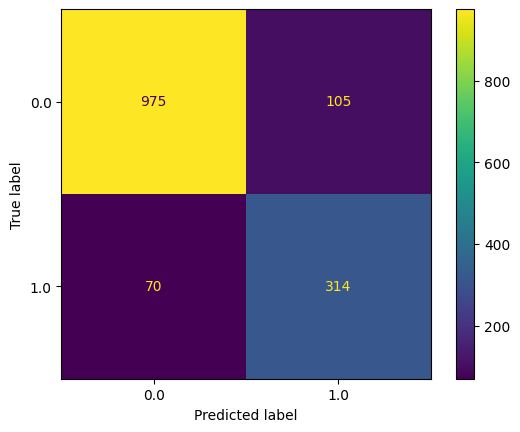

In [44]:
cmd = ConfusionMatrixDisplay(cnf)
cmd=cmd.from_predictions(test_labels, yhat)
cmd

105 false negatives 70 false positives out of 1464 predictions.

# Results/Conclusions

The 2nd model performed best based on the validation sets, higher accuracy than the baseline model and the faster learning model.  The chosen model's accuracy on the holdout test set was 88%.  This can be compared to guessing based on the sample balance, which would yield 73% accuracy.  Thus this model can be used as a check by the radiologist, for instance on x-rays that they are less certain about.  